In [2]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib.image import imread 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
print(digits)

(1797, 64)
{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pi

2


<Figure size 432x288 with 0 Axes>

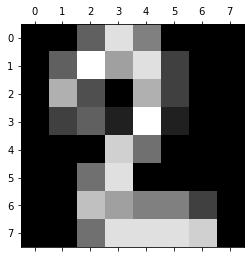

In [3]:
#VISUALIZE DATA
print(digits.target[258])

plt.gray() 
plt.matshow(digits.images[258]) 
plt.show() 

In [4]:
df_y = pd.DataFrame(data=digits.target).iloc[:,0]
print(df_y)

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: 0, Length: 1797, dtype: int32


In [5]:
df_x = pd.DataFrame(data=digits.data, columns=digits.feature_names)
print(df_x)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
0           0.0        0.0      

In [6]:
#SPLIT TRAINING AND TEST DATA
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [7]:
x_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
828,0.0,0.0,10.0,16.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,13.0,6.0,0.0,0.0,0.0,0.0
204,0.0,4.0,16.0,16.0,16.0,16.0,5.0,0.0,0.0,11.0,...,0.0,0.0,0.0,4.0,16.0,12.0,1.0,0.0,0.0,0.0
782,0.0,0.0,1.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,2.0,12.0,16.0,11.0,1.0,0.0
449,0.0,0.0,5.0,14.0,9.0,0.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,8.0,13.0,15.0,10.0,0.0,0.0
1422,0.0,0.0,0.0,11.0,16.0,16.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,14.0,4.0,0.0,0.0,0.0


In [8]:
y_train.head()

828     7
204     5
782     6
449     3
1422    7
Name: 0, dtype: int32

In [9]:
rf=RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [10]:
pred=rf.predict(x_test)

In [11]:
pred

array([8, 7, 0, 5, 3, 5, 1, 3, 1, 8, 2, 7, 8, 4, 7, 7, 8, 3, 0, 6, 4, 7,
       1, 0, 8, 6, 8, 1, 0, 0, 0, 2, 7, 1, 1, 7, 6, 3, 1, 3, 4, 2, 9, 1,
       2, 0, 0, 7, 3, 3, 2, 9, 7, 6, 1, 8, 5, 8, 6, 7, 5, 6, 9, 3, 1, 4,
       1, 9, 7, 8, 4, 4, 2, 4, 1, 6, 6, 7, 8, 1, 2, 6, 9, 1, 7, 4, 2, 6,
       7, 3, 7, 5, 4, 8, 5, 1, 5, 6, 7, 1, 2, 5, 5, 2, 0, 1, 5, 2, 2, 3,
       0, 4, 5, 6, 9, 3, 9, 5, 7, 4, 7, 8, 9, 4, 9, 7, 9, 7, 9, 4, 3, 0,
       5, 4, 9, 2, 9, 2, 9, 6, 2, 6, 0, 5, 5, 8, 9, 2, 4, 3, 4, 4, 2, 0,
       9, 8, 4, 3, 6, 6, 2, 9, 7, 1, 5, 7, 6, 0, 5, 3, 2, 3, 1, 3, 2, 6,
       6, 0, 8, 2, 5, 7, 6, 8, 4, 6, 2, 2, 0, 4, 0, 3, 0, 4, 0, 1, 5, 6,
       4, 7, 1, 5, 4, 5, 5, 3, 4, 4, 6, 3, 7, 1, 1, 3, 5, 7, 5, 0, 1, 9,
       5, 0, 8, 7, 4, 0, 6, 6, 5, 0, 2, 4, 2, 9, 4, 0, 6, 2, 9, 1, 9, 6,
       3, 5, 0, 8, 3, 1, 2, 1, 3, 2, 0, 9, 0, 7, 5, 9, 1, 8, 6, 9, 6, 8,
       8, 6, 2, 4, 5, 9, 9, 1, 5, 2, 8, 4, 7, 9, 8, 8, 0, 1, 7, 3, 2, 2,
       1, 0, 3, 2, 3, 9, 7, 2, 0, 0, 1, 2, 6, 0, 9,

In [12]:
s=y_test.values
count=0

In [13]:
for i in range(len(pred)):
    if pred[i]==s[i]:
        count=count+1

In [14]:
print("prediction accuracy is " + str(count / len(pred)))

prediction accuracy is 0.9777777777777777
